In [ ]:
# Automatically reloads imported files: this is not done manually by ipynb; this magic command tells the compiler that each time we update an imported file we want to reload it
%load_ext autoreload
# Reload all modules before executing code
%autoreload 2

#change
#temp

In [ ]:
import sys,os

sys.path.append(os.getcwd())



In [ ]:
#Spip list | grep tensorflow
import sys,os
sys.path.append(os.getcwd())
from main import DL


2025-05-09 18:38:25.949839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746815905.969191    5720 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746815905.975226    5720 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746815905.990483    5720 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746815905.990500    5720 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746815905.990503    5720 computation_placer.cc:177] computation placer alr

In [ ]:
test = DL()

In [ ]:
test.importData(isTesting = True)

In [ ]:
test.Train()


TrainingData/1127_Mandolin_Tumours_5000_0_5_10_shift_tumour_1_15_scaled_rotated_shift_combined_withCSH_5000/Parameters.mat
TrainingData/1127_Mandolin_Tumours_5000_0_5_10_shift_tumour_1_15_scaled_rotated_shift_combined_withCSH_5000/nImages10000.mat
TrainingData/1209_Mandolin_Tumours_160_1_10_shift_1_15_for_training/Parameters.mat
TrainingData/1209_Mandolin_Tumours_160_1_10_shift_1_15_for_training/nImages150.mat
TrainingData/1216_CSH_10000_training_submarine_fHb_0_5_to_10_for_sampling_depth_testing/DL_nImages10000.mat
TrainingData/1216_CSH_10000_training_submarine_fHb_0_5_to_10_for_sampling_depth_testing/Parameters.mat
TrainingData/20240517_Elise_CSH_10000_Shallow_LargerWidth_largerFOV_low_res_R_only/DL_nImages10000.mat
TrainingData/20240517_Elise_CSH_10000_Shallow_LargerWidth_largerFOV_low_res_R_only/Parameters.mat
TrainingData/20240624_CSHsubmarine_TBR/Classify_nImages10000.mat
TrainingData/20240624_CSHsubmarine_TBR/Classify_nImages210.mat
TrainingData/20240624_CSHsubmarine_TBR/DL_nIma

Enter the name of the dataset you want to import e.g. matALL.mat  TrainingData/20241118_10000_training_withTBR_original/nImages10000_new.mat
Enter the value of the background 10
There are 10000 inputs in this directory, use them all? (Y/N)  Y
There are 6 spatial frequencies in the FL input, use them all? (Y/N)  Y


Load time = 2.599999788799323e-07
(10000, 101, 101, 2)


Adjust parameters before modelling and fitting? (Y/N)  N
Are you transfer training (i.e., Initial weights come from another pre-trained model)? (Y/N)  N
Enter a name for exporting the model:  20250509_masking_at_beginning_via_dropout


I0000 00:00:1746809278.622141   30525 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20710 MB memory:  -> device: 0, name: NVIDIA A10G, pci bus id: 0000:00:1e.0, compute capability: 8.6
/home/ec2-user/SageMaker/.persisted_conda/gtxDL_3_12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 101, 101,  │          0 │ -                 │
│ (InputLayer)        │ 6, 1)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 101, 101,  │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 101, 101,  │          0 │ input_layer_1[0]… │
│                     │ 6, 1)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 101, 101,  │          0 │ input_layer[0][0] │
│                     │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 101, 101,  │      1,792 │ dropout_1[0][0]   │
│                     │ 6, 64)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 101, 101,  │      1,216 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 101, 101,  │    110,656 │ conv3d[0][0]      │
│                     │ 6, 64)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 101, 101,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 101, 101,  │    110,656 │ conv3d_1[0][0]    │
│                     │ 6, 64)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 101, 101,  │     36,928 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 101, 101,  │          0 │ conv3d_2[0][0]    │
│                     │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 101, 101,  │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │ 448)              │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 50, 50,    │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 448)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 50, 50,    │  1,032,448 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 50, 50,    │    590,080 │ conv2d_3[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 25, 25,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 25, 25,    │  1,180,160 │ max_pooling2d_1[

 Total params: 33,145,413 (126.44 MB)

 Trainable params: 33,145,413 (126.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


I0000 00:00:1746809310.492939    3373 service.cc:152] XLA service 0x7f0124003010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746809310.492977    3373 service.cc:160]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2025-05-09 16:48:31.313842: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746809313.764698    3373 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-09 16:48:46.244699: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng33{k2=2,k6=0,k13=2,k14=0,k22=2} for conv %cudnn-conv-bias-activation.120 = (f32[32,64,101,101]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,2,101,101]{3,2,1,0} %bitcast.19384, f32[64,2,3,3]{3,2,1,0} %bitcast.19375, f32[64]{0} %bitcast.19477), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActi

250/250 ━━━━━━━━━━━━━━━━━━━━ 234s 631ms/step - conv2d_28_loss: 0.8957 - conv2d_28_mae: 0.8957 - conv2d_31_loss: 7.6300 - conv2d_31_mae: 7.6300 - loss: 8.5257 - val_conv2d_28_loss: 0.7101 - val_conv2d_28_mae: 0.7096 - val_conv2d_31_loss: 0.5590 - val_conv2d_31_mae: 0.5587 - val_loss: 1.2683 - learning_rate: 5.0000e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 580ms/step - conv2d_28_loss: 0.6510 - conv2d_28_mae: 0.6510 - conv2d_31_loss: 0.6091 - conv2d_31_mae: 0.6091 - loss: 1.2601 - val_conv2d_28_loss: 0.6478 - val_conv2d_28_mae: 0.6475 - val_conv2d_31_loss: 0.6363 - val_conv2d_31_mae: 0.6365 - val_loss: 1.2840 - learning_rate: 5.0000e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 580ms/step - conv2d_28_loss: 0.4728 - conv2d_28_mae: 0.4728 - conv2d_31_loss: 0.3778 - conv2d_31_mae: 0.3778 - loss: 0.8506 - val_conv2d_28_loss: 0.5288 - val_conv2d_28_mae: 0.5286 - val_conv2d_31_loss: 0.3418 - val_conv2d_31_mae: 0.3420 - val_loss: 0.8705 - learning_rate: 5.0000e-04
Epoch 4/100
250/250

x

In [ ]:
test.upload_to_S3()

In [ ]:
test.load()


In [ ]:
test.modelD.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i, 0])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

In [ ]:
test.Analysis()

In [ ]:
test.Analysis()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize fx as given
fx = [1, 2, 3, 4, 5, 6]  # Placeholder, will be mapped to your custom labels

# Custom x-axis labels
custom_labels = [0, 0.0140, 0.0240, 0.0390, 0.068, 0.2]

# Find the index where the maximum occurs in the last frame (i == test.FL.shape[0] - 1)
# test.FL has shape (n, m, p), where n is time, m is rows, and p is columns
last_frame = test.FL[-1]  # Get the last frame (2D array)
max_index = np.unravel_index(np.argmax(last_frame), last_frame.shape)  # Find the 2D index of the max value

# Now plot for each i, using the same max_index for each iteration
for i in range(test.FL.shape[0]):
    # Extract the data for the current iteration and the maximum index
    max_value = test.FL[i, max_index[0], max_index[1]]  # Use the max_index for the current frame
    plt.plot(fx, max_value)  # Plot using the maximum index for the current frame
    plt.ylabel('Max Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title(f'Tumour Max Intensity at pixel with max intensity for fx = 0')

# Set custom labels for x-axis
plt.xticks(fx, custom_labels)

# Show the plot
plt.show()  # Display the plot after the loop finishes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

raw_RE = test.RE

for x in range(7):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

    for i in range(6):
        ax = axes[i]
        img_data = np.squeeze(raw_RE[x, :, :, i])
        
        # Display image with percentile-based scaling
        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')

        # Create colorbar with compact scientific formatting
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Adjust as needed
        cbar.formatter = formatter
        cbar.ax.yaxis.set_offset_position('left')  # Moves exponent to top of vertical bar
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

raw_FL = test.FL / (10**4)

for x in range(test.FL.shape[0]):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

    for i in range(6):
        ax = axes[i]  # Access each axis
        img_data = np.squeeze(raw_FL[x, :, :, i])
        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')  # Turn off both axes and ticks

        # Create a colorbar with compact scientific formatting
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Forces scientific notation outside this range
        cbar.ax.yaxis.set_offset_position('left')  # Moves the offset label (e.g. ×10³) to the top
        cbar.formatter = formatter
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()


In [ ]:
#create x-y plot with min depth of all liquid phantoms 
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
#true_DF = np.array([[0, 2, 4, 6] for x in range(4)])
#pred_DF = np.array([[-0.10, 1.93, 3.51, 7.01], [0.29, 3.21, 4.70, 6.02], [0.37, 2.05, 3.31, 4.89], [0.28, 3.07, 4.23, 5.01]])

true_DF =  np.array([2, 4, 6, 8, 2,4,6,8,2,4,6,8,2,4,6,8,2,4,6,8])
#pred_DF = np.array([0.79, 2.93, 6.65, 8.81, 0.31, 0.422, 3.20, 5.77, 0.64, 3.41, 6.50, 8.43, 0.53, 3.35, 6.45, 8.55, 0.78, 2.96, 3.21, 3.93, 6.41, 7.49, 9.31, 2.91, 3.44, 7.9])
pred_DF = np.array([1.56, 3.56, 5.6, 7.52, 2.43, 3.83, 5.54, 6.78, 2.84, 4.71, 2.19, 8.61, 1.75, 3.25, 4.62, 8.44, 2.80, 4.72, 5.61, 7.43])



print(np.mean(np.abs(true_DF - pred_DF)))
print(np.std(np.abs(true_DF - pred_DF)))

plt.scatter(true_DF,pred_DF)
plt.plot(plt.xlim([-0.5, 8.5]), plt.ylim([-0.5, 8.5]),color='k')


DF_min_classify = np.array(true_DF) < 5 
DFP_min_classify = np.array(pred_DF) < 5
        
failed_result = DF_min_classify != DFP_min_classify
failed_result = np.squeeze(failed_result)

plt.scatter(true_DF[failed_result],pred_DF[failed_result], color = ['red'])

plt.ylabel("Predicted Depth (mm)")
plt.xlabel("True Depth (mm)")
plt.title("Minimum Margin Thickness Graph", pad = 10)
plt.tight_layout()
font = {'weight': 'bold', 'size':10}
matplotlib.rc('font', **font)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Scale OP data for visualization
test.OP[:, :, :, 0] /= 10

for x in range(4):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # Adjusted figsize for 2 plots

    for i in range(2):
        ax = axes[i]
        img_data = np.squeeze(test.OP[x, :, :, i])
        
        # Display image with 2.5–97.5 percentile range
        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')

        # Use ScalarFormatter for clean scientific notation
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Force scientific notation outside range
        cbar.formatter = formatter
        cbar.ax.yaxis.set_offset_position('left')  # Move exponent to top
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()

# Scale back to original magnitude
test.OP[:, :, :, 0] *= 10


In [ ]:
#visualization of the filters and feature maps 
conv_layers = []
for layer in test.modelD.layers:
    
    if 'conv' not in layer.name:
        continue    

    conv_layers.append(layer)
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

In [ ]:
# retrieve weights from the second hidden layer

filters, bias = conv_layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
from matplotlib import pyplot
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,0,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [ ]:
#list out convolutional layer indexes 
for i in range(len(test.modelD.layers)):
    layer = test.modelD.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

In [ ]:
#define the model 
test.visualize_feature_maps(65)

In [ ]:
#plot original image
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

In [ ]:
#calculating features_map
from matplotlib import pyplot
features = test.modelD_visualize.predict([test.OP, test.FL], batch_size = 1)
print(features.shape)



fig = pyplot.figure(figsize=(20, 15))
for x in range(1):
    #define new figure
    fig, ax = plt.subplots(8, 8)
    for i in range(1,features.shape[-1]+1):
        #plt.subplot(8, 8,i)
        ax[(i-1)//8, (i-1)%8].imshow(features[0,:,:,i-1] , cmap='gray')
        ax[(i-1)//8, (i-1)%8].axis('off')
    
pyplot.show()

In [ ]:
#load phantom data with different depths, check intensity values at each spatial frequency 
test.import_data_for_testing()


In [ ]:
print(test.FL.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize fx as given
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

# Find the index where the maximum occurs in the last frame (i == test.FL.shape[0] - 1)
# test.FL has shape (n, m, p), where n is time, m is rows, and p is columns
last_frame = test.FL[-1]  # Get the last frame (2D array)
max_index = np.unravel_index(np.argmax(last_frame), last_frame.shape)  # Find the 2D index of the max value

# Now plot for each i, using the same max_index for each iteration
for i in range(test.FL.shape[0]):
    # Extract the data for the current iteration and the maximum index
    max_value = test.FL[i, max_index[0], max_index[1]]  # Use the max_index for the current frame
    plt.plot(fx, max_value)  # Plot using the maximum index for the current frame
    plt.ylabel('Max Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title(f'Tumour Max Intensity at pixel with max intensity for fx = 0')

plt.show()  # Display the plot after the loop finishes


In [ ]:
#analyze only the middle portion 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, np.mean(test.FL[i,40:60,40:60], axis = (0,1)))
    plt.ylabel('Mean Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title('Tumour 4 Mean Intensity')

In [ ]:
#analyze only the middle pixel 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, test.FL[i,50,50])
    plt.ylabel('Pixel Wise Intensity')
    plt.xlabel('Fx')
    plt.title('Pixel Wise Intensity')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find the index of the minimum value in the matrix
def find_min_index(matrix):
    min_index_flat = np.argmin(matrix)  # Find the flat index of the minimum
    row, col = np.unravel_index(min_index_flat, matrix.shape)  # Convert to row, col
    return row, col

# Loop through the FL data (assuming test.FL and test.DF are 3D arrays)
for i in range(test.FL.shape[0]):
    DF = np.squeeze(test.DF[i])  # Remove single dimensions if necessary
    print("DF for index {}:".format(i), DF)
    
    # Find the row and column of the minimum value in DF
    row, col = find_min_index(DF)
    print(f"Minimum DF value at ({row}, {col}): {DF[row, col]}")
    plt.imshow(DF)
    
    # Plot the pixel intensity for the minimum DF pixel
    plt.plot(fx, test.FL[i, row, col])  # Plot intensity from the minimum DF pixel
    plt.ylabel('Pixel Wise Intensity')
    plt.xlabel('Fx')
    plt.title(f'Pixel Wise Intensity for Min DF at index {i}')
    plt.show()  # Display the plot


C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 13 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 14 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 15 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x3

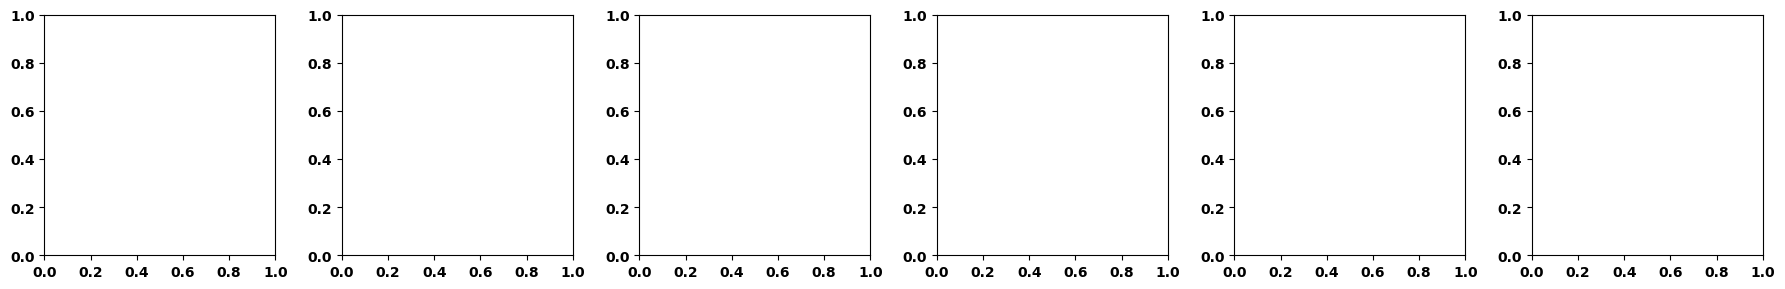

C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 19 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 20 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 21 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x3

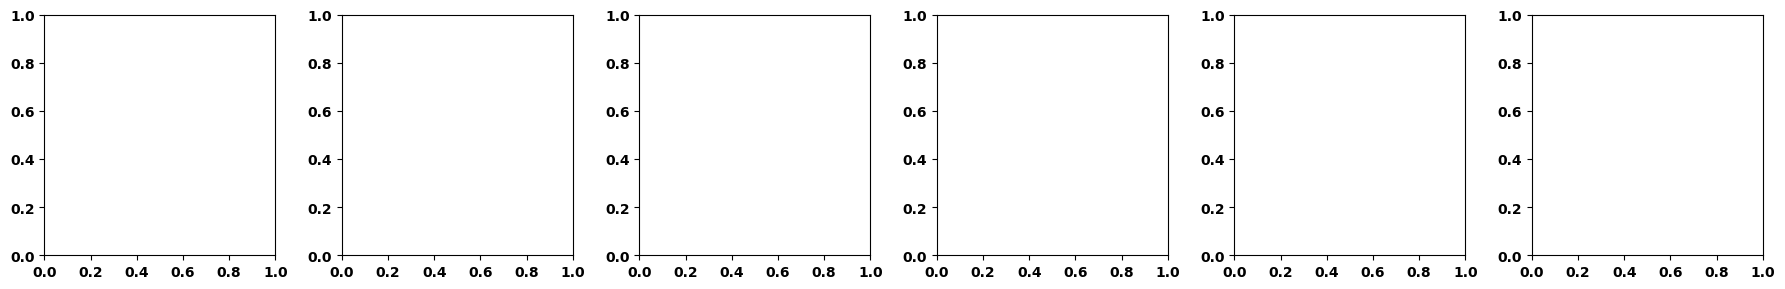

C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 25 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 26 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 27 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x3

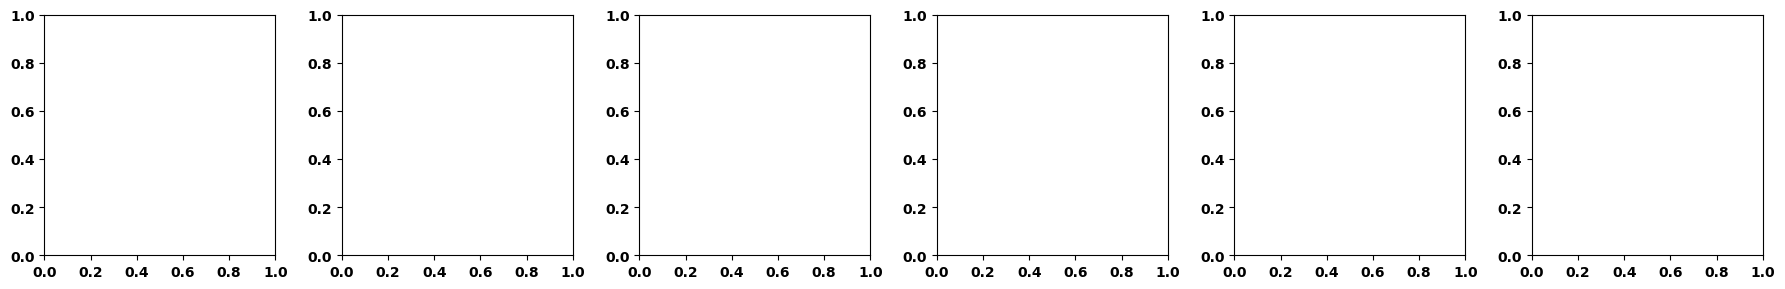

C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 31 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 32 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x300 with 33 Axes> than <Figure size 1800x300 with 6 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)
C:\Users\Hikaru Kurosawa\AppData\Local\Temp\ipykernel_39776\3044439820.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1800x3

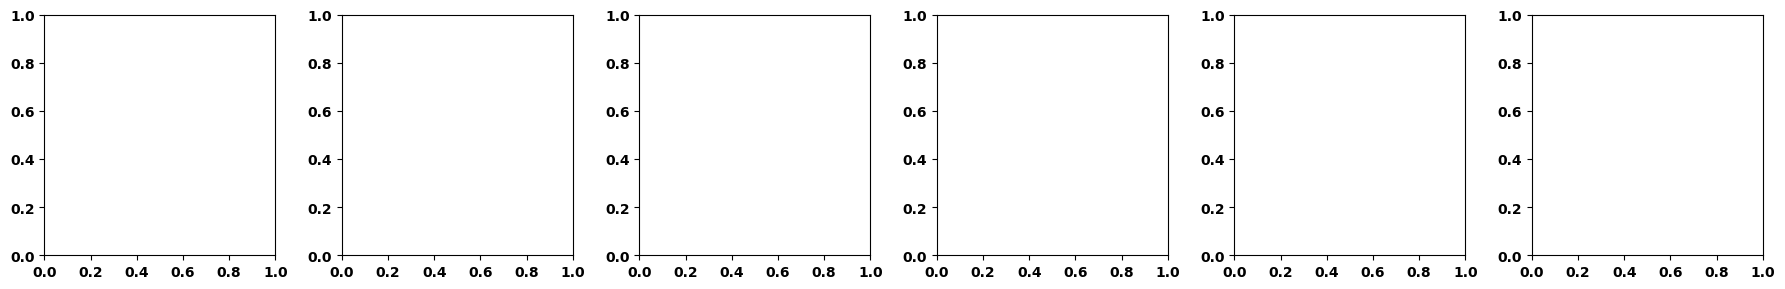

In [ ]:
#obtain the onion peeler images 

raw_FL = test.FL / (10**4)

for x in range(len(raw_FL)):
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size
    for i in range(raw_FL.shape[-1]):
        #if the first spatial frequency, plot normally 
        if i == 0:
            img_data = np.squeeze(raw_FL[x, :, :, i])
        else:
            img_data = np.squeeze(raw_FL[x, :, :, i] - raw_FL[x, :, :, i-1])

        img = ax.imshow(
            img_data,
            vmin=np.percentile(img_data, 2.5),
            vmax=np.percentile(img_data, 97.5),
            cmap='jet'
        )
        ax.axis('off')  # Turn off both axes and ticks

        # Create a colorbar with compact scientific formatting
        cbar = fig.colorbar(img, ax=ax, shrink=0.8)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-2, 2))  # Forces scientific notation outside this range
        cbar.ax.yaxis.set_offset_position('left')  # Moves the offset label (e.g. ×10³) to the top
        cbar.formatter = formatter
        cbar.update_ticks()
        cbar.ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()

